kütüphaneler

pip install wordcloud

In [2]:
from textblob import TextBlob
import pandas as pd
import re
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

## textblob kurulumu

pip install -U textblob

## textblob kullanımı (örnek) + metin ing çevirme

In [3]:
metin = ["Benim adım Uraz", 
         "kitap okumayı ve ok atmayı seviyorum.", 
         "Bu ürün çok kötü"]

In [4]:
# polarity > 0 ise olumlu
# polarity < 0 olumsuz
# polarity = 0 duygu yok

olumlu_yazilar = []
olumlu_sonuc = []

olumsuz_yazilar = []
olumsuz_sonuc = []

duygu_yok = []

for yaz in metin:
    # blob1 = TextBlob(yaz)
    blob_eng = TextBlob(yaz).translate(to = "en")
    # print(blob_eng.sentiment)
    
    if(blob_eng.polarity > 0):
        olumlu_yazilar.append(blob_eng)
        olumlu_sonuc.append(blob_eng.sentiment)
    elif(blob_eng.polarity < 0):
        olumsuz_yazilar.append(blob_eng)
        olumsuz_sonuc.append(blob_eng.sentiment)
    else:
        duygu_yok.append(blob_eng)

In [5]:
olumlu_yazilar

[TextBlob("I love reading books and shooting arrows.")]

In [6]:
olumsuz_yazilar

[TextBlob("This product is very bad")]

In [7]:
duygu_yok

[TextBlob("My name is Uraz")]

# -----------------------------------------------------------------

## Metin Temizleme

In [8]:
import re

In [9]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','', str(text)) # removed @mentions
    text = re.sub(r'#', '', text) # removing the '#' symbol
    text = re.sub(r'\n', '', text) # remove \n  (ben yaptım)
    text = re.sub(r'TR[\s]+','', text) # removing RT (retweet?) 
    text = re.sub(r'https?:\/\/\S+', '', text) # remove the hyper link
    
    return text

In [10]:
col_names = ["Tweet"]
df = pd.read_csv("kanalistanbuldata.csv", sep='delimiter', header=None ,names=col_names, encoding='ISO-8859-9',engine='python')

In [11]:
df.head()

,Tweet
0,next digit 195 resistors 199 218 250 301 352 ...
1,kanalistanbul ;;
2,"Kanalistanbul, but Nehiri?stanbul, necessary f..."
3,I think they are rehearsing the historical isl...
4,really great change in istanbul i wish everywh...


In [12]:
df["Tweet"] = df["Tweet"].apply(cleanTxt)

In [13]:
df.head()

,Tweet
0,next digit 195 resistors 199 218 250 301 352 ...
1,kanalistanbul ;;
2,"Kanalistanbul, but Nehiri?stanbul, necessary f..."
3,I think they are rehearsing the historical isl...
4,really great change in istanbul i wish everywh...


## metin olumlu olumsuz tespit etmek

In [14]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df["Subjectivity"] = df["Tweet"].apply(getSubjectivity)
df["Polarity"] = df["Tweet"].apply(getPolarity)

df.head()

,Tweet,Subjectivity,Polarity
0,next digit 195 resistors 199 218 250 301 352 ...,0.166667,0.023333
1,kanalistanbul ;;,0.000000,0.000000
2,"Kanalistanbul, but Nehiri?stanbul, necessary f...",0.833333,-0.300000
3,I think they are rehearsing the historical isl...,0.416667,0.170455
4,really great change in istanbul i wish everywh...,0.516667,0.366667


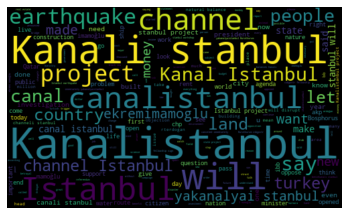

In [15]:
allWords = ' '.join( [twts for twts in df['Tweet']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
TextBlob("Great Work").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

## CSV dosyasına atma yeni veriyi

### Csv dosyalarını birleştirme, kod ile de yaptım
https://yilmazsarac.com.tr/csv-birlestirici/

In [17]:
df.head()

,Tweet,Subjectivity,Polarity
0,next digit 195 resistors 199 218 250 301 352 ...,0.166667,0.023333
1,kanalistanbul ;;,0.000000,0.000000
2,"Kanalistanbul, but Nehiri?stanbul, necessary f...",0.833333,-0.300000
3,I think they are rehearsing the historical isl...,0.416667,0.170455
4,really great change in istanbul i wish everywh...,0.516667,0.366667


In [18]:
df.to_csv(r"kanalistanbul\kanalistanbul.csv", index = False)

In [19]:
# Kontrol etmek

dff = pd.read_csv(r"kanalistanbul\kanalistanbul.csv")
dff.head()

,Tweet,Subjectivity,Polarity
0,next digit 195 resistors 199 218 250 301 352 ...,0.166667,0.023333
1,kanalistanbul ;;,0.000000,0.000000
2,"Kanalistanbul, but Nehiri?stanbul, necessary f...",0.833333,-0.300000
3,I think they are rehearsing the historical isl...,0.416667,0.170455
4,really great change in istanbul i wish everywh...,0.516667,0.366667


## veri setlerini birleştirme

In [20]:
df_kanalistanbul = pd.read_csv(r"kanalistanbul\kanalistanbul.csv")
# eklersin sonra

In [21]:
frames = [df_kanalistanbul]
data = pd.concat(frames,ignore_index=True)

In [22]:
data.head()

,Tweet,Subjectivity,Polarity
0,next digit 195 resistors 199 218 250 301 352 ...,0.166667,0.023333
1,kanalistanbul ;;,0.000000,0.000000
2,"Kanalistanbul, but Nehiri?stanbul, necessary f...",0.833333,-0.300000
3,I think they are rehearsing the historical isl...,0.416667,0.170455
4,really great change in istanbul i wish everywh...,0.516667,0.366667


## veri etiketleme

In [23]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score > 0:
        return "Positive"
    else:
        return "Neutral"
    
data["Analysis"] = data["Polarity"].apply(getAnalysis)
data.drop(['Subjectivity', 'Polarity'], axis=1, inplace=True)
print(data.head())

                                               Tweet  Analysis
0  next digit 195  resistors 199 218 250 301 352 ...  Positive
1                                   kanalistanbul ;;   Neutral
2  Kanalistanbul, but Nehiri?stanbul, necessary f...  Negative
3  I think they are rehearsing the historical isl...  Positive
4  really great change in istanbul i wish everywh...  Positive


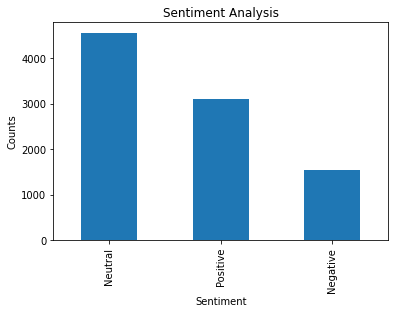

In [24]:
data["Analysis"].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.show()